In [33]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [ ]:
# Load the dataset
try:
    df = pd.read_csv('wine.csv')  # Replace with your dataset file
    print("Dataset Overview:")
    print(df.head())
    print("\nBasic Statistics:")
    print(df.describe())
except FileNotFoundError:
    print("Error: The file 'wine.csv' was not found. Please ensure the file exists in the current directory.")
    exit()


In [ ]:
# Task 1: Exploratory Data Analysis (EDA)
# Distribution of features
df.hist(bins=20, figsize=(15, 10))
plt.suptitle("Feature Distributions")
plt.show()

# Box plots for feature distributions
plt.figure(figsize=(15, 8))
sns.boxplot(data=df)
plt.title("Box Plot of Features")
plt.show()

# Correlation matrix
correlation_matrix = df.corr(numeric_only=True)  # Ensure only numeric columns are used
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [ ]:
# Task 2: Dimensionality Reduction with PCA
# Separate features and target 
if 'target' in df.columns:  # Assuming the dataset has a 'target' column
    X = df.drop(columns=['target'])  # Drop non-numeric target column
else:
    X = df

# Standardize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
principal_components = pca.fit_transform(scaled_data)

# Scree plot to determine optimal number of components
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.title("Cumulative Explained Variance")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid()
plt.show()

In [ ]:


# Choose optimal number of components (e.g., 95% explained variance)
optimal_components = np.argmax(np.cumsum(pca.explained_variance_ratio_) >= 0.95) + 1
print(f"Optimal Number of Principal Components: {optimal_components}")

# Transform data to the selected number of components
pca = PCA(n_components=optimal_components)
pca_data = pca.fit_transform(scaled_data)

# Task 3: Clustering with Original Data
# Apply K-means clustering on original data
kmeans_original = KMeans(n_clusters=3, random_state=42)  # Adjust n_clusters as needed
clusters_original = kmeans_original.fit_predict(scaled_data)

# Visualize clustering results (for 2D visualization, use first two features)
plt.figure(figsize=(10, 6))
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=clusters_original, cmap='viridis')
plt.title("Clustering Results on Original Data")
plt.xlabel("Feature 1 (Standardized)")
plt.ylabel("Feature 2 (Standardized)")
plt.show()


In [ ]:
# Evaluate clustering performance
try:
    silhouette_original = silhouette_score(scaled_data, clusters_original)
    db_index_original = davies_bouldin_score(scaled_data, clusters_original)
    print(f"Original Data - Silhouette Score: {silhouette_original}, Davies-Bouldin Index: {db_index_original}")
except ValueError as e:
    print(f"Error calculating metrics for original data: {e}")

Dataset Overview:
   Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0     1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1     1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2     1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3     1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4     1    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0           0.28             2.29   5.64  1.04      3.92     1065  
1           0.26             1.28   4.38  1.05      3.40     1050  
2           0.30             2.81   5.68  1.03      3.17     1185  
3           0.24             2.18   7.80  0.86      3.45     1480  
4           0.39             1.82   4.32  1.04      2.93      735  

Basic Statistics:
             Type     Alcohol       Malic         Ash  Alcalinity   Magnesium  \
count  178.

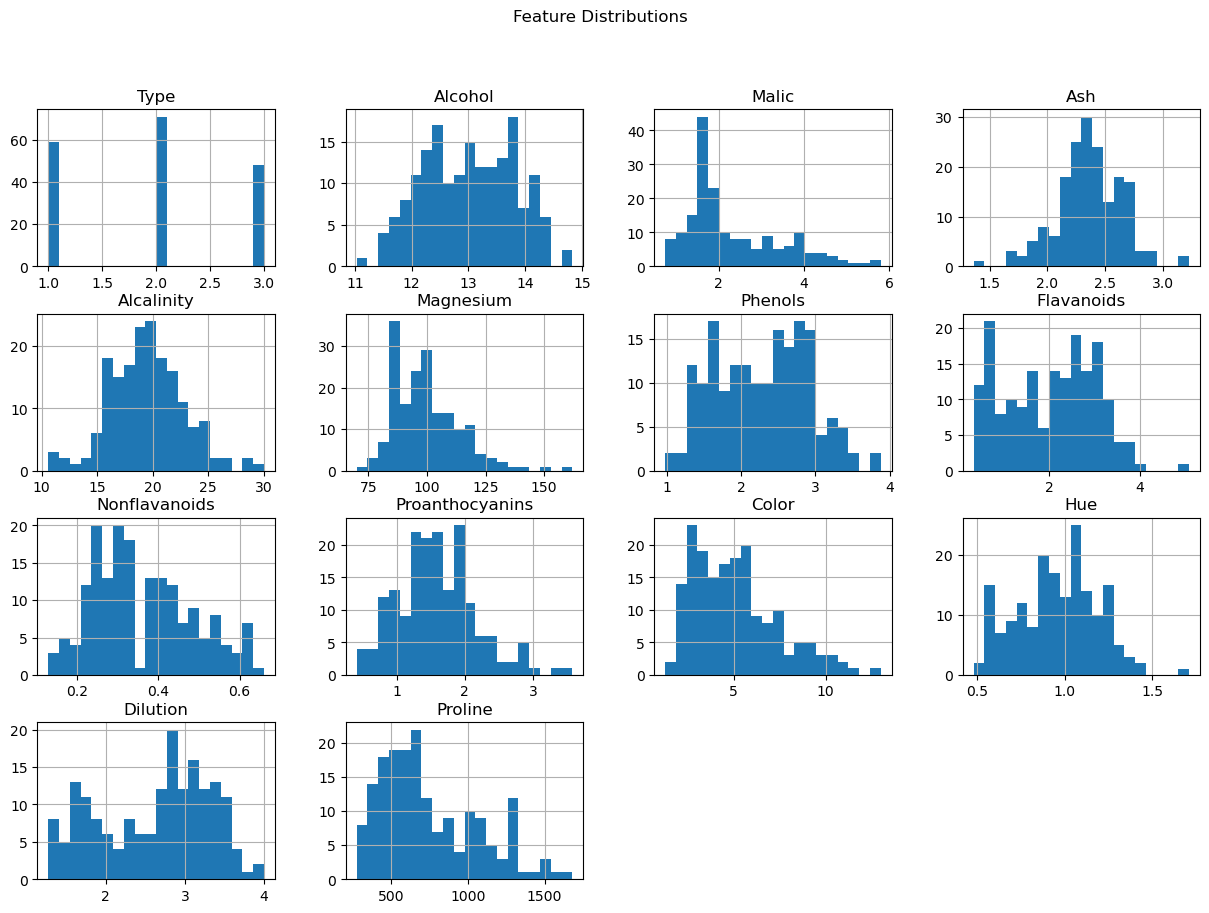

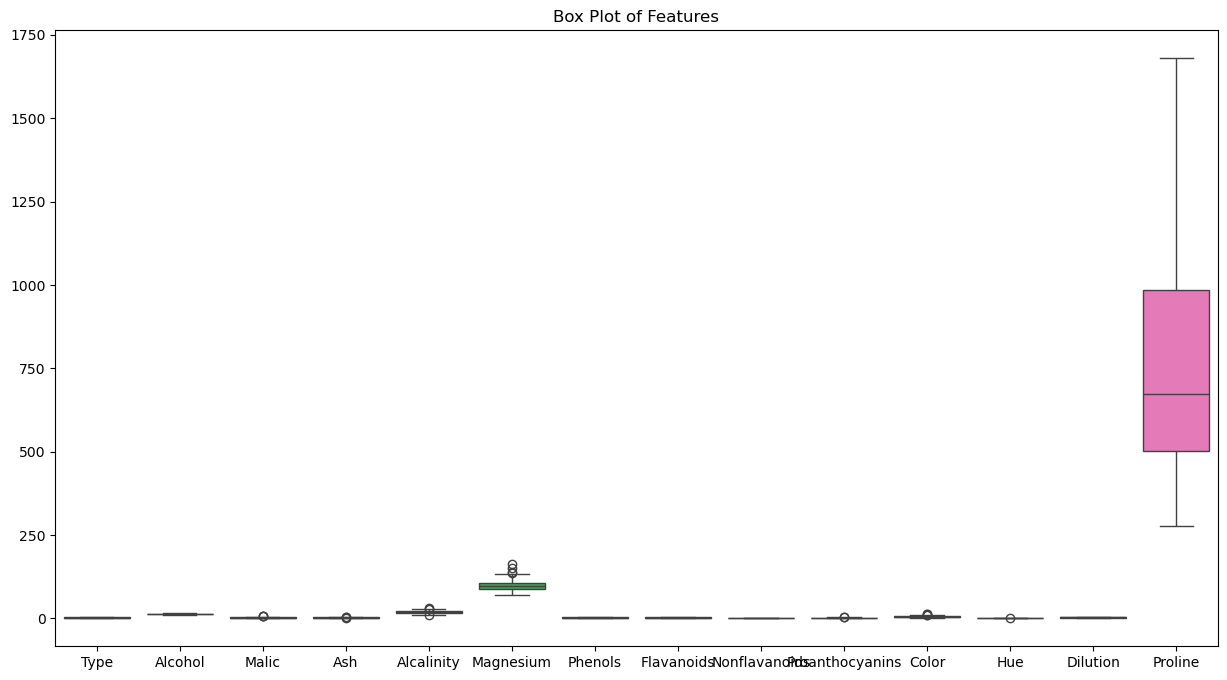

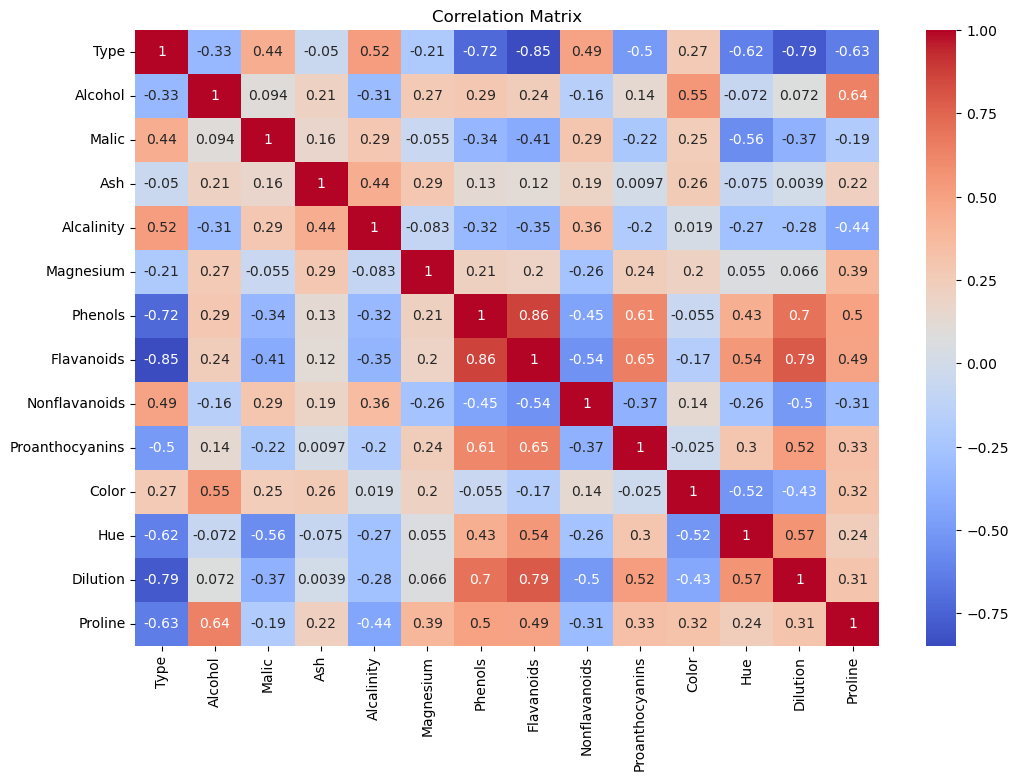

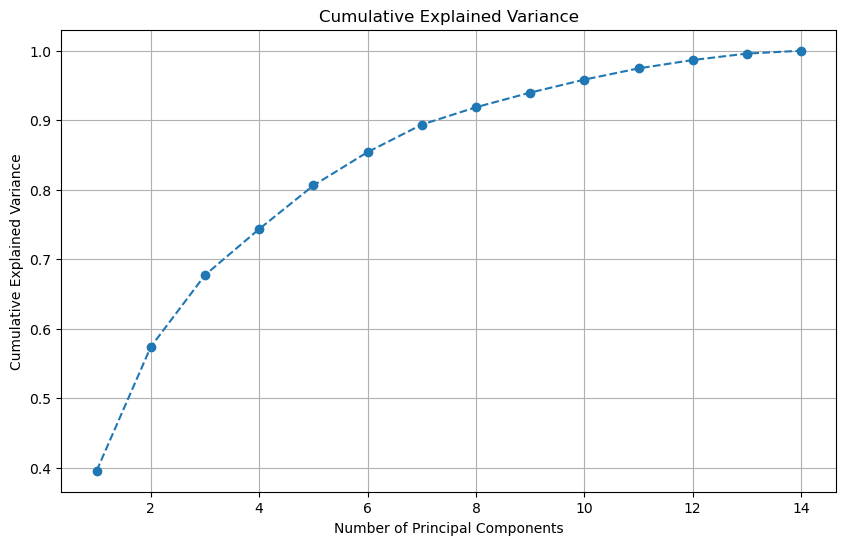

Optimal Number of Principal Components: 10


C:\Users\shami\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


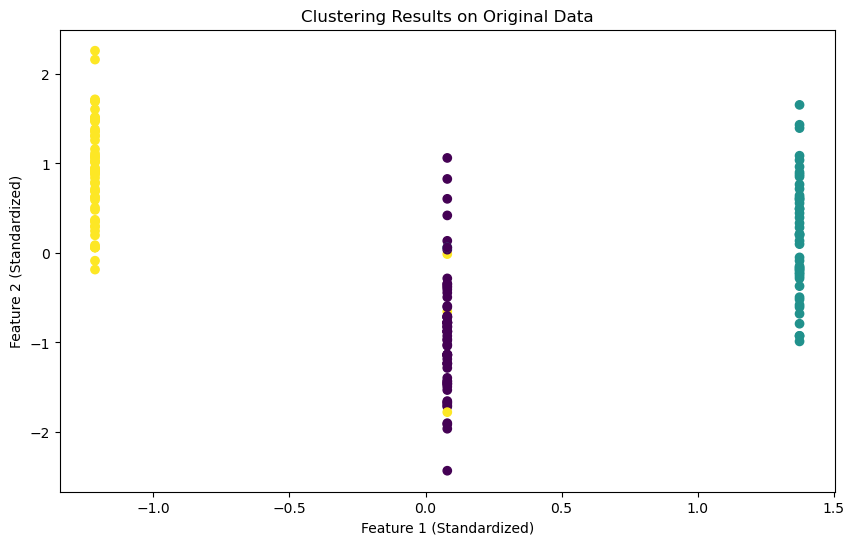

Original Data - Silhouette Score: 0.30648398324833453, Davies-Bouldin Index: 1.315707552261773


C:\Users\shami\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


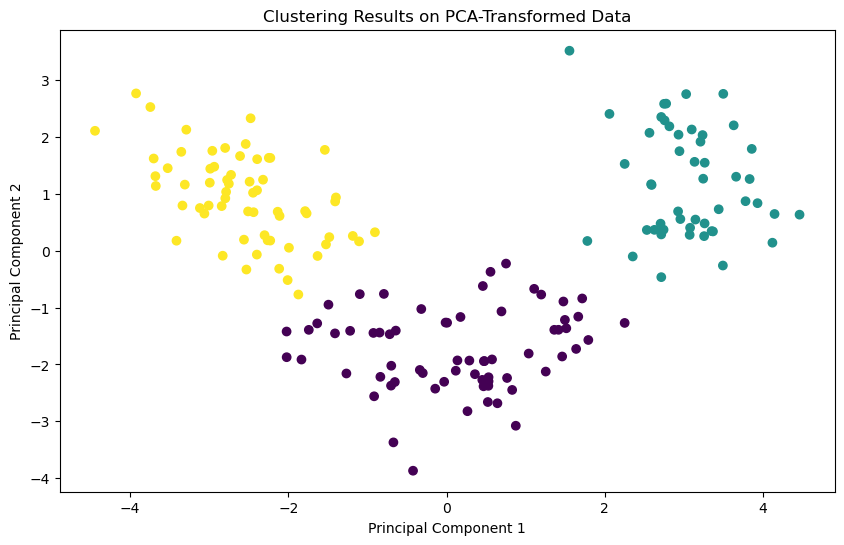

PCA Data - Silhouette Score: 0.3229205540723301, Davies-Bouldin Index: 1.2578453408449175

Comparison of Clustering Results:
Original Data - Silhouette Score: 0.30648398324833453, Davies-Bouldin Index: 1.315707552261773
PCA Data - Silhouette Score: 0.3229205540723301, Davies-Bouldin Index: 1.2578453408449175

Conclusion and Insights:
1. PCA reduces dimensionality while retaining most of the variance, which can simplify clustering.
2. Compare silhouette scores and Davies-Bouldin indices to evaluate the impact of PCA on clustering performance.
3. Use PCA when dealing with high-dimensional data to reduce noise and computational complexity.
4. Direct clustering on original data may be preferable when interpretability of original features is important.


In [31]:


# Task 4: Clustering with PCA Data
# Apply K-means clustering on PCA-transformed data
kmeans_pca = KMeans(n_clusters=3, random_state=42)  # Adjust n_clusters as needed
clusters_pca = kmeans_pca.fit_predict(pca_data)

# Visualize clustering results (for 2D visualization, use first two principal components)
if pca_data.shape[1] >= 2:  # Ensure there are at least two principal components
    plt.figure(figsize=(10, 6))
    plt.scatter(pca_data[:, 0], pca_data[:, 1], c=clusters_pca, cmap='viridis')
    plt.title("Clustering Results on PCA-Transformed Data")
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.show()
else:
    print("Not enough principal components to visualize in 2D.")


In [ ]:

# Evaluate clustering performance
try:
    silhouette_pca = silhouette_score(pca_data, clusters_pca)
    db_index_pca = davies_bouldin_score(pca_data, clusters_pca)
    print(f"PCA Data - Silhouette Score: {silhouette_pca}, Davies-Bouldin Index: {db_index_pca}")
except ValueError as e:
    print(f"Error calculating metrics for PCA-transformed data: {e}")



In [ ]:

# Task 5: Comparison and Analysis
print("\nComparison of Clustering Results:")
try:
    print(f"Original Data - Silhouette Score: {silhouette_original}, Davies-Bouldin Index: {db_index_original}")
    print(f"PCA Data - Silhouette Score: {silhouette_pca}, Davies-Bouldin Index: {db_index_pca}")
except NameError:
    print("Metrics could not be calculated due to errors.")

In [ ]:

# Task 6: Conclusion and Insights
print("\nConclusion and Insights:")
print("1. PCA reduces dimensionality while retaining most of the variance, which can simplify clustering.")
print("2. Compare silhouette scores and Davies-Bouldin indices to evaluate the impact of PCA on clustering performance.")
print("3. Use PCA when dealing with high-dimensional data to reduce noise and computational complexity.")
print("4. Direct clustering on original data may be preferable when interpretability of original features is important.")